In [4]:
%cd ../../

C:\Users\Abhijeet\Documents\GitHub\bootcamps


In [7]:
from bootcamps.bl.dbsetup import DBConnector
from bootcamps.certgen.generate_certs import GenerateCerts
from bootcamps.config import CONFIG

In [8]:
import pandas as pd

In [228]:
from plotnine import *

In [10]:
dbconn = DBConnector()

In [194]:
reg_df = pd.read_sql("""
select * from registration
""",dbconn.engine)

In [197]:
reg_df["timestamp"] = pd.to_datetime(reg_df["timestamp"])

In [198]:
reg_df.head(3)

,timestamp,emailid,first_name,last_name,banner_id,program,bootcamp_id,bootcamps,statistics_knowledge,python_knowledge,r_knowledge,is_processed,course_completed,cert_sent
0,2020-11-16 13:52:24,mrobe116@uncc.edu,Mitchell,Roberts,801034668,MS DSBA,1,Overview of Statistics for Data Science,1,1,1,0,0,0
1,2020-11-16 13:52:24,mrobe116@uncc.edu,Mitchell,Roberts,801034668,MS DSBA,2,Introduction to Python For Data Science,1,1,1,0,0,0
2,2020-11-16 13:52:24,mrobe116@uncc.edu,Mitchell,Roberts,801034668,MS DSBA,3,Introduction to R For Data Science,1,1,1,0,0,0


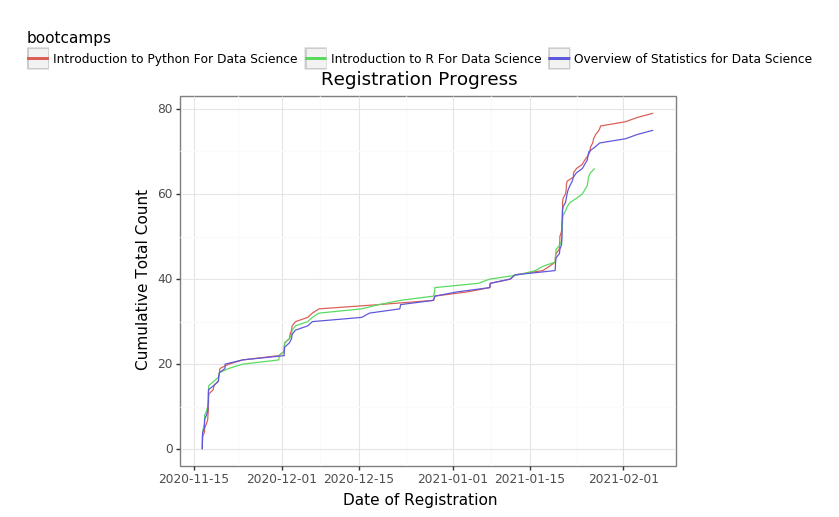

<ggplot: (192316392056)>

In [217]:
(
    ggplot(reg_df.join((reg_df.groupby(["bootcamps" ])
           .cumcount().reset_index(name="cum_count")))
           , aes(x="timestamp" , y="cum_count" , color="bootcamps"))
    + geom_line()
    + theme_bw()
    + xlab("Date of Registration")
    + ylab("Cumulative Total Count")
    + ggtitle("Registration Progress")
    + theme(legend_position="top")
)

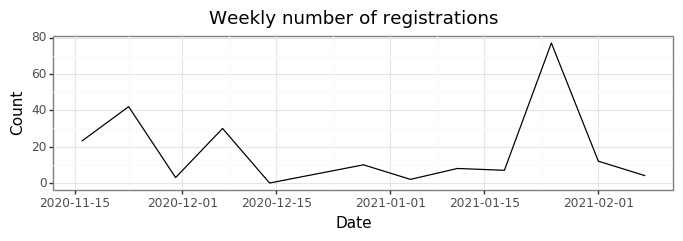

<ggplot: (-9223371844538399947)>

In [218]:
(
    ggplot(reg_df.groupby(pd.Grouper(key="timestamp" , freq="W-MON")).size().reset_index(name="count")
           ,aes(x="timestamp" , y="count"))
    + geom_line()
    + theme_bw()
    + theme(figure_size=(8,2))
    + ggtitle("Weekly number of registrations")
    + xlab("Date")
    + ylab("Count")
)

In [224]:
survey_df = reg_df[["emailid","bootcamps" , "bootcamp_id","python_knowledge" , "r_knowledge" , "statistics_knowledge"]]

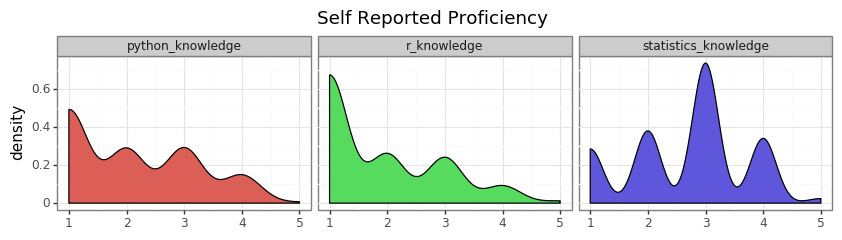

<ggplot: (-9223371844534358931)>

In [295]:
(
    ggplot(survey_df.melt(id_vars=["emailid"] , value_vars=["statistics_knowledge" , "python_knowledge" , "r_knowledge"])
           , aes(x="value" , fill="variable"))
    + geom_density()
    + facet_wrap("~ variable")
    + theme_bw()
    + ggtitle("Self Reported Proficiency")
    + scale_fill_discrete(guide=False)
    + theme(figure_size=(10,2) , axis_title_x = element_blank())
)

In [229]:
grades_df = pd.read_sql("""
select * from grades_tracker
""",dbconn.engine)

In [230]:
grades_df.head(2)

,full_name,login_id,bootcamp_id,bootcamp,total_score,max_score,assignments_completed,total_assignments
0,Points Possible,None,3,Introduction to R For Data Science,2394.00,2394,255,255
1,"Barston, Peter",pbarston,1,Overview of Statistics for Data Science,299.79,316,23,24


In [231]:
grades_df = grades_df[grades_df["full_name"].str.strip(" ") != "Points Possible"]

In [232]:
grades_df["attempted"] = ~grades_df["total_score"].isna()

In [233]:
grades_df.groupby(["bootcamp" ])["attempted"].value_counts(normalize=True).reset_index(name="prop")

,bootcamp,attempted,prop
0,Introduction to Python For Data Science,False,0.729323
1,Introduction to Python For Data Science,True,0.270677
2,Introduction to R For Data Science,False,0.803922
3,Introduction to R For Data Science,True,0.196078
4,Overview of Statistics for Data Science,False,0.779070
5,Overview of Statistics for Data Science,True,0.220930


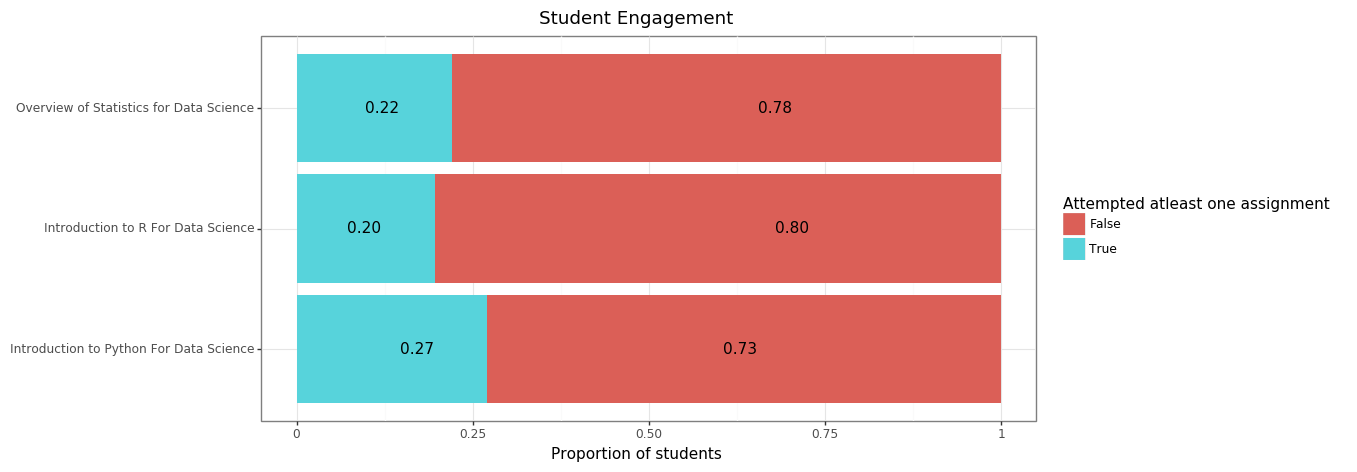

<ggplot: (-9223371844535868549)>

In [298]:
(
    ggplot(grades_df.groupby(["bootcamp" ])["attempted"].value_counts(normalize=True).reset_index(name="prop")
           , aes(x="bootcamp" , y="prop" , fill="attempted" ))
    + geom_col(position="fill" )
    + geom_text(aes(label="prop")
                , position="fill" 
                ,nudge_y=-0.1
                , format_string="{:.2f}")
    + coord_flip()
    + theme_bw()
    + theme(figure_size=(10,5) , axis_title_y = element_blank())
    + ggtitle("Student Engagement")
    + ylab("Proportion of students")
    + guides(fill=guide_legend(title="Attempted atleast one assignment"))
)

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_density : Removed 313 rows containing non-finite values.


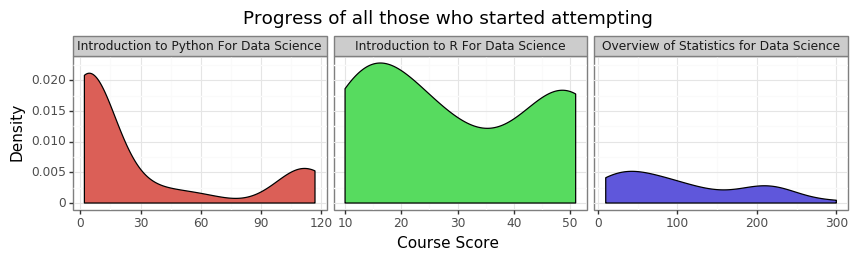

<ggplot: (192314911962)>

In [139]:
(
    ggplot(grades_df , aes(x="total_score" , fill="bootcamp"))
    + geom_density()
    + facet_wrap("~ bootcamp" ,scales="free_x")
    + theme_bw()
    + theme(figure_size=(10,2))
    + scale_fill_discrete(guide=False)
    + ggtitle("Progress of all those who started attempting")
    + xlab("Course Score")
    + ylab("Density")
)

In [283]:
grade_date = pd.read_sql("""
select * , (login_id || "@uncc.edu") as gt_emailid
from grades_tracker gt
join registration r on gt_emailid = r.emailid and gt.bootcamp_id = r.bootcamp_id
""" , dbconn.engine)

In [284]:
grade_date = grade_date.loc[: , ~grade_date.columns.duplicated()]

In [285]:
grade_date["timestamp"] = pd.to_datetime(grade_date["timestamp"]) 
grade_date["per_completed"] = grade_date["assignments_completed"] /  grade_date["total_assignments"]

In [286]:
grade_date.head()

,full_name,login_id,bootcamp_id,bootcamp,total_score,max_score,assignments_completed,total_assignments,timestamp,emailid,...,program,bootcamps,statistics_knowledge,python_knowledge,r_knowledge,is_processed,course_completed,cert_sent,gt_emailid,per_completed
0,"Roberts, Mitchell",mrobe116,1,Overview of Statistics for Data Science,NaN,316,0,24,2020-11-16 13:52:24,mrobe116@uncc.edu,...,MS DSBA,Overview of Statistics for Data Science,1,1,1,0,0,0,mrobe116@uncc.edu,0.000000
1,"Roberts, Mitchell",mrobe116,2,Introduction to Python For Data Science,12.0,122,3,23,2020-11-16 13:52:24,mrobe116@uncc.edu,...,MS DSBA,Introduction to Python For Data Science,1,1,1,0,0,0,mrobe116@uncc.edu,0.130435
2,"Roberts, Mitchell",mrobe116,3,Introduction to R For Data Science,15.0,51,2,5,2020-11-16 13:52:24,mrobe116@uncc.edu,...,MS DSBA,Introduction to R For Data Science,1,1,1,0,0,0,mrobe116@uncc.edu,0.400000
3,"Manam, Sirisha",smanam,1,Overview of Statistics for Data Science,NaN,316,0,24,2020-11-16 13:59:57,smanam@uncc.edu,...,MS DSBA,Overview of Statistics for Data Science,3,3,3,0,0,0,smanam@uncc.edu,0.000000
4,"Manam, Sirisha",smanam,2,Introduction to Python For Data Science,2.0,122,1,23,2020-11-16 13:59:57,smanam@uncc.edu,...,MS DSBA,Introduction to Python For Data Science,3,3,3,0,0,0,smanam@uncc.edu,0.043478


In [287]:
grade_date[["statistics_knowledge", "r_knowledge","python_knowledge"]] = grade_date[["statistics_knowledge", "r_knowledge","python_knowledge"]].astype("category")

In [291]:
def bootcamp_kt(bootcamp_id):
    knowledge = {
        1 : "statistics_knowledge",
        2 : "python_knowledge",
        3 : "r_knowledge"
    }
    kc = knowledge[bootcamp_id]
    print(kc)
    return ( 
    ggplot(grade_date[grade_date["bootcamp_id"] == bootcamp_id]
           , aes(x="assignments_completed"  , fill=kc))
    + geom_density()
    + facet_wrap(f"~ {kc}")
    #+ scale_fill_gradient(low="#2a9d8f" , high="#e76f51")
    + theme_bw()
        + ggtitle("Number of Assignments Completed Vs Declared Knowledge")
    )

statistics_knowledge


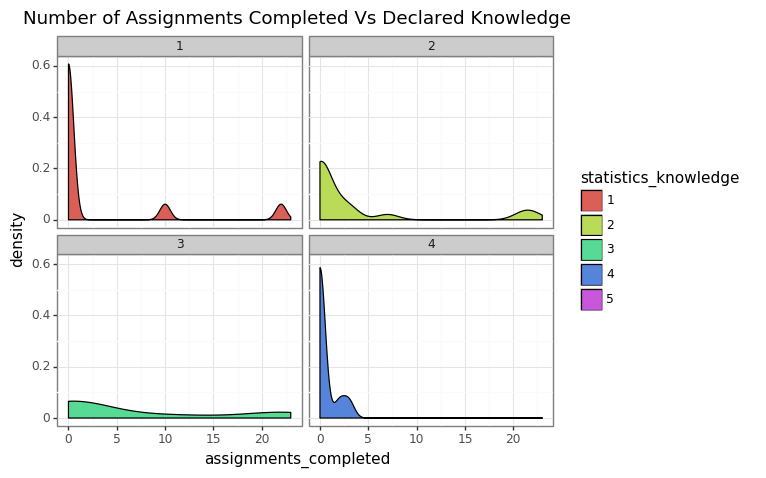

<ggplot: (-9223371844534494562)>
python_knowledge


C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_density.py:152: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\stats\stat_density.py:154: PlotnineWarning: Groups with fewer than 2 data points have been removed.


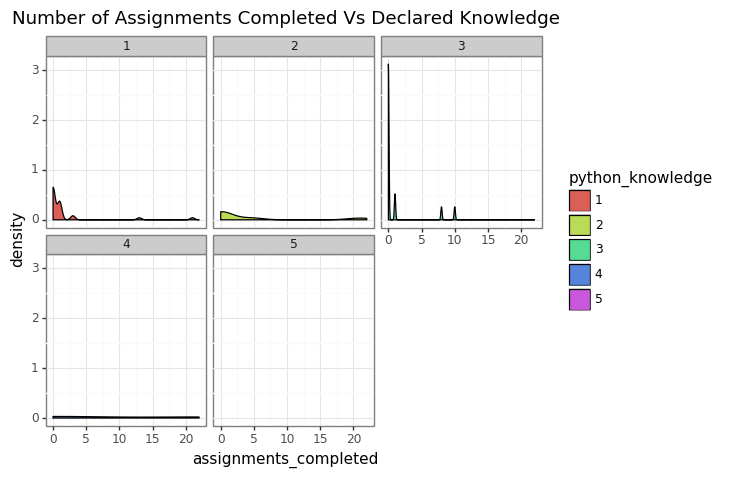

<ggplot: (192320512993)>
r_knowledge


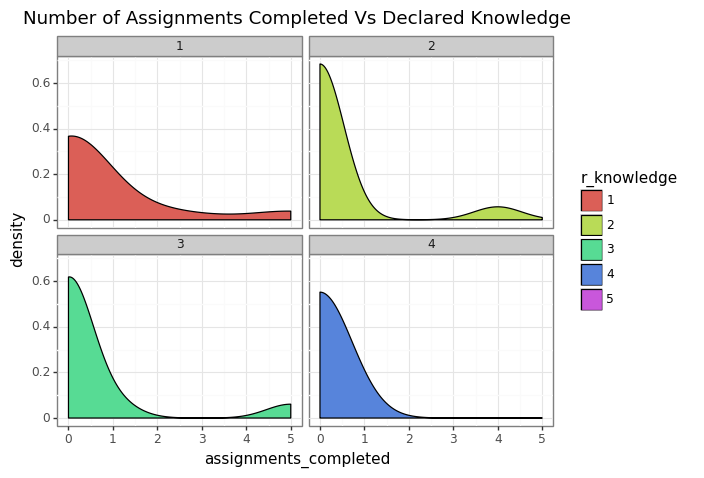

<ggplot: (-9223371844533979960)>


In [292]:
for i in range(1,4):
    print(bootcamp_kt(i))

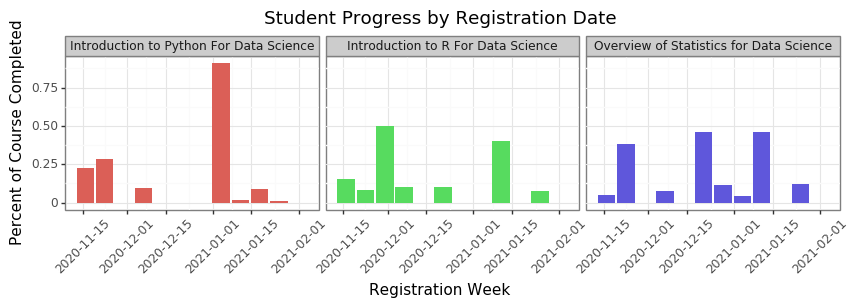

<ggplot: (-9223371844538451189)>

In [155]:
temp_df = (
    grade_date.groupby(["bootcamp" 
                    , pd.Grouper(key="timestamp" , freq="W-MON")])["per_completed"]
          .mean()
          .reset_index()
)

(
    ggplot(temp_df , aes(x="timestamp" , y="per_completed" , fill="bootcamp"))
    + geom_col()
    + facet_wrap("~ bootcamp")
    + scale_fill_discrete(guide=False)
    + theme_bw()
    + theme(figure_size=(10,2) , axis_text_x = element_text(rotation=45))
    + ylab("Percent of Course Completed")
    + xlab("Registration Week")
    + ggtitle("Student Progress by Registration Date")
    
)

C:\Users\Abhijeet\Documents\GitHub\Datathon\dt\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 420 rows containing missing values.


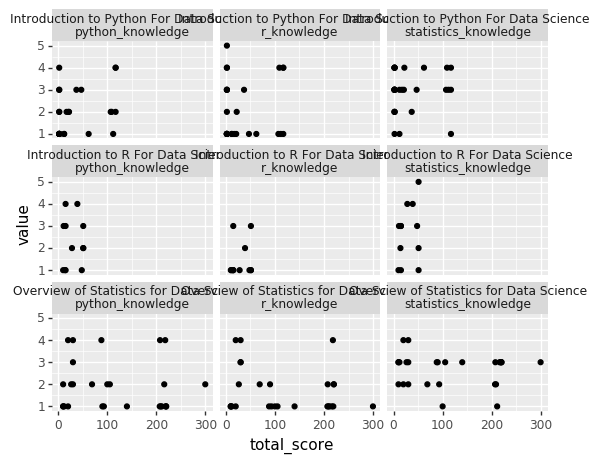

<ggplot: (-9223371844538460500)>

In [161]:
(
    ggplot(survey_df , aes(x="total_score" , y="value"))
    + geom_point()
    + facet_wrap(" ~ bootcamp + variable")
)

In [305]:
cert_df = pd.read_sql("""
select * , (c.login_id || "@uncc.edu") as c_emailid
from certificates c
join registration r  
     on c.bootcamp_id= r.bootcamp_id
     and c_emailid  = r.emailid
""" , dbconn.engine)
cert_df.head()

,login_id,bootcamp_id,cert_sent_date,hash,timestamp,emailid,first_name,last_name,banner_id,program,bootcamp_id,bootcamps,statistics_knowledge,python_knowledge,r_knowledge,is_processed,course_completed,cert_sent,c_emailid
0,akomalil,3,2021-01-25 22:38:53.504891,6298d707ad3b79af981e90630a757540,12/5/2020 17:12:39,akomalil@uncc.edu,Anjana,Komali,801160745,MS DSBA,3,Introduction to R For Data Science,2,3,3,0,0,0,akomalil@uncc.edu
1,dwang27,3,2021-01-25 22:38:53.512868,ca10399627135b1ead2cfde3b456e87b,11/30/2020 11:17:51,dwang27@uncc.edu,Dan,Wang,801222630,CERT DSBA,3,Introduction to R For Data Science,5,2,1,0,0,0,dwang27@uncc.edu
2,vvenka10,3,2021-01-25 22:38:53.521844,ccef3a80377620897007887427c3c6d6,11/16/2020 23:55:47,vvenka10@uncc.edu,Vathsavi,Venkat,801200137,MS DSBA,3,Introduction to R For Data Science,1,2,1,0,0,0,vvenka10@uncc.edu
3,acarden6,2,2021-01-25 22:38:53.537802,340cac8a577743fd75a80f7324fc8839,11/19/2020 12:11:13,acarden6@uncc.edu,Arturo,Cardenas,800-881569,MS DSBA,2,Introduction to Python For Data Science,3,4,4,0,0,0,acarden6@uncc.edu
4,smamilla,2,2021-01-25 22:38:53.544783,a0865760fa231b97c07d814e4237c485,11/19/2020 18:43:37,smamilla@uncc.edu,Sai Venkatesh,Mamillapalli,801168147,MS DSBA,2,Introduction to Python For Data Science,4,4,4,0,0,0,smamilla@uncc.edu


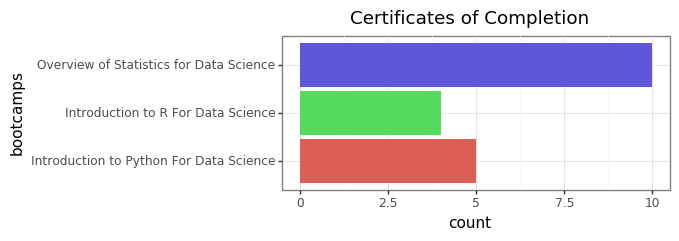

<ggplot: (192322890749)>

In [314]:
(
    ggplot(cert_df.groupby("bootcamps").size().reset_index(name="count") 
           , aes(x="bootcamps" , y="count" , fill="bootcamps"))
    + geom_col()
    + coord_flip()
    + theme_bw()
    + theme(figure_size=(5,2))
    + scale_fill_discrete(guide=False)
    + ggtitle("Certificates of Completion")
)